In [1]:
import nltk
nltk.data.path.append("F://nltk_data")
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords

import string

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('tweets.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25491 entries, 0 to 25490
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_name         25489 non-null  object 
 1   user_location     18116 non-null  object 
 2   user_description  22796 non-null  object 
 3   user_created      25490 non-null  object 
 4   user_followers    25490 non-null  float64
 5   user_friends      25490 non-null  float64
 6   user_favourites   25490 non-null  object 
 7   user_verified     25490 non-null  object 
 8   date              25490 non-null  object 
 9   text              25490 non-null  object 
 10  hashtags          17152 non-null  object 
 11  source            25489 non-null  object 
dtypes: float64(2), object(10)
memory usage: 2.3+ MB


#### 1. 用戶分佈情況：通過分析用戶位置和關注者數量，可以了解用戶在哪些地區和社交圈中更活躍，從而更好地定位和優化推廣策略。

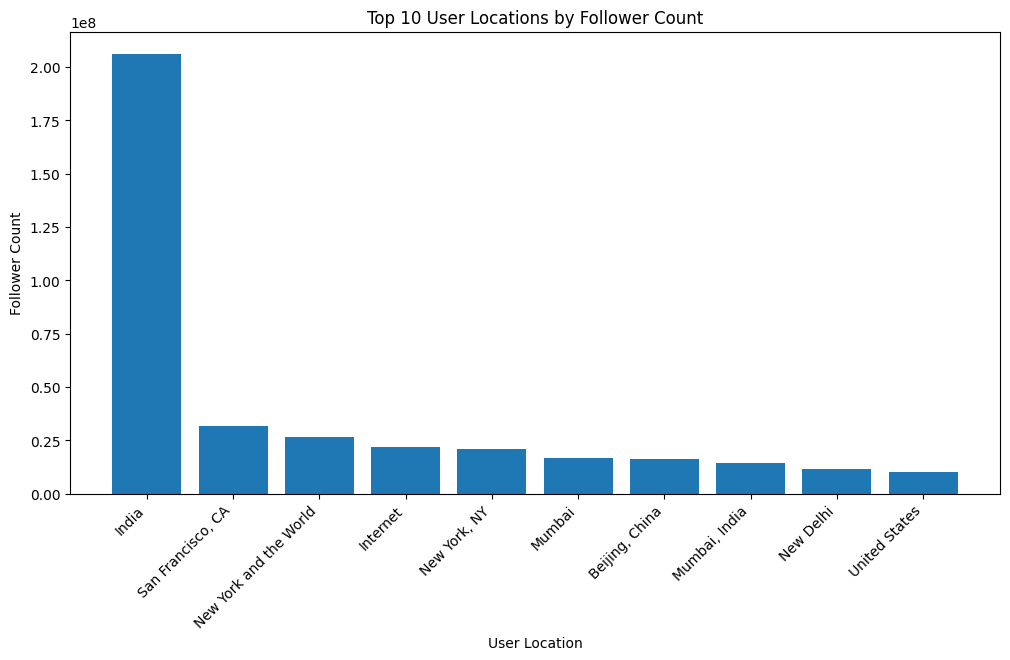

In [4]:
user_loc = df.groupby('user_location').agg({'user_followers': 'sum'}).reset_index()
user_loc = user_loc.dropna()  # 删除缺失值


user_loc_top10 = user_loc.sort_values('user_followers', ascending=False).iloc[:10]


plt.figure(figsize=(12, 6))
plt.bar(user_loc_top10['user_location'], user_loc_top10['user_followers'])
plt.title('Top 10 User Locations by Follower Count')
plt.xlabel('User Location')
plt.ylabel('Follower Count')
plt.xticks(rotation=45, ha='right')
plt.show()

#### 2. 用戶描述關鍵詞分析：通過對用戶描述中的關鍵詞進行分析，可以了解用戶的興趣愛好、職業等信息，從而更好地了解用戶需求和偏好，進行更有針對性的推廣和營銷。

twitter: 30756
twitterlayoffs: 24421
https: 16029
app: 9748
web: 9576
iphone: 7854
elonmusk: 7303
android: 6741
elon: 3420
people: 3368
employees: 3197
india: 2887
musk: 2867
new: 2695
like: 2288
get: 2000
usa: 1833
news: 1826
twittertakeover: 1711
fired: 1640


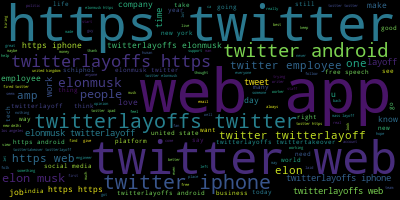

In [5]:
# 读取推特数据
with open('tweets.csv', 'r', encoding='utf-8') as f:
    data = f.read()

# 分词
tokens = word_tokenize(data)

# 去除停用词和标点符号
stopwords = set(stopwords.words('english'))
filtered_tokens = [token.lower() for token in tokens if token.lower() not in stopwords and token.isalpha()]

# 计算词频
fdist = nltk.FreqDist(filtered_tokens)
top_words = fdist.most_common(20)

# 打印出现频率最高的20个单词
for word, frequency in top_words:
    print(f'{word}: {frequency}')

# 生成文字云
text = ' '.join(filtered_tokens)
wordcloud = WordCloud().generate(text)
wordcloud.to_image()

#### 3. 用戶互動情況分析：通過分析用戶的好友數量和點贊收藏情況等數據，可以了解用戶與其他用戶的互動情況，了解用戶的社交網絡和影響力，從而進行更有效的社交媒體營銷和口碑管理。

In [6]:
import pandas as pd

df = pd.read_csv('tweets.csv', encoding='utf-8')
df['user_favourites'] = pd.to_numeric(df['user_favourites'], errors='coerce')

user_interactions = df.groupby('user_name')[['user_followers', 'user_friends', 'user_favourites']].sum(numeric_only=True)
user_interactions['interaction_index'] = user_interactions['user_followers'] + user_interactions['user_friends'] + user_interactions['user_favourites']

top_users = user_interactions.sort_values('interaction_index', ascending=False).head(10)
print(top_users)


                user_followers  user_friends  user_favourites  \
user_name                                                       
NDTV                87934900.0          70.0            300.0   
Economic Times      77418300.0         810.0           8075.0   
David Leavitt        5945145.0      249413.0       37972255.0   
DNA                 36738649.0         305.0           2128.0   
TechCrunch          30860806.0        2974.0          17303.0   
Bloomberg           26515086.0        4311.0          11043.0   
Anonymous           22005265.0        3474.0         189903.0   
Forbes              18492410.0        5114.0          10199.0   
Moneycontrol        16187344.0        4155.0          14399.0   
CGTN                13204552.0          75.0            215.0   

                interaction_index  
user_name                          
NDTV                   87935270.0  
Economic Times         77427185.0  
David Leavitt          44166813.0  
DNA                    36741082.0  
Tec

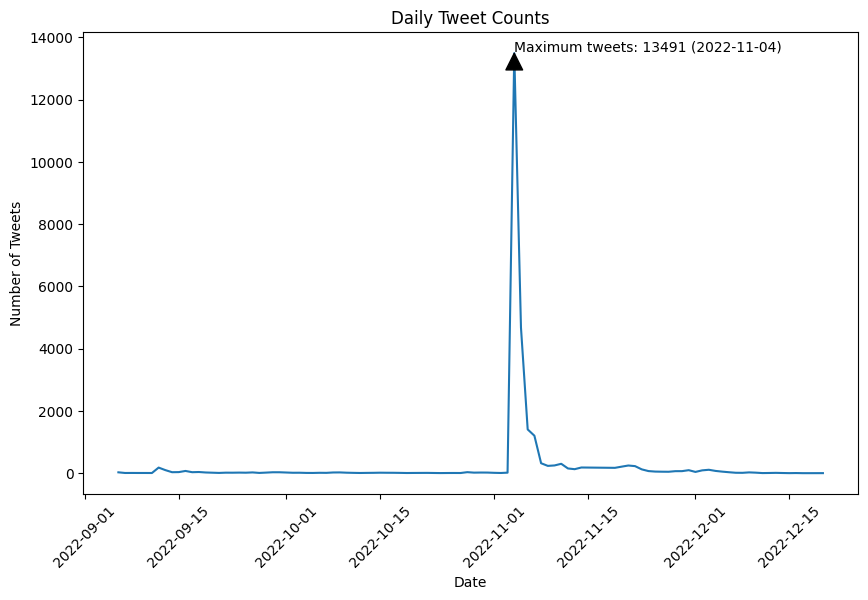

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取推特數據
df = pd.read_csv('tweets.csv', encoding='utf-8')

# 將時間轉換成 pandas 的 datetime 格式
df['datetime'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# 以日期為 index 進行分組計數
daily_count = df.groupby(df['datetime'].dt.date)['datetime'].count()

# 找到推文最多的日期
max_date = daily_count.idxmax()
max_count = daily_count[max_date]

# 繪製時間序列圖
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(daily_count.index, daily_count.values)
ax.set(xlabel='Date', ylabel='Number of Tweets', title='Daily Tweet Counts')
ax.annotate(f'Maximum tweets: {max_count} ({max_date})', xy=(max_date, max_count), xytext=(max_date, max_count + 50),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.xticks(rotation=45)
plt.show()
